Question 3
Mriganko Roy
20A2HP415

In [1]:
import warnings
warnings.filterwarnings('ignore')


# loading files as Data frames

In [2]:
import numpy as np
import pandas as pd

In [3]:
customers_data = pd.read_csv("https://raw.githubusercontent.com/mrigankoml/MLAP_Term-IV/main/MLAP2021Exam-main/MALP2021%20Question%20paper/customerspends.csv")

In [4]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [5]:
customers_data.head()

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


Creating Scatter plot

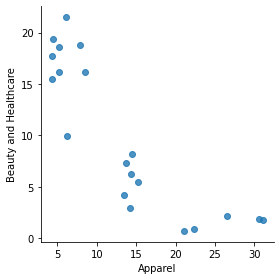

In [6]:
sn.lmplot( "Apparel", "Beauty and Healthcare", data=customers_data, fit_reg = False, size = 4 );

# **K-means Clustering**

In [7]:
from sklearn.cluster import KMeans
clusters = KMeans( 3 )
clusters.fit( customers_data )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
customers_data["clusterid"] = clusters.labels_

In [9]:
customers_data[0:5]

,Customer,Apparel,Beauty and Healthcare,clusterid
0,1,21.10,0.7,1
1,2,15.23,5.5,2
2,3,5.22,18.6,0
3,4,31.10,1.8,1
4,5,6.12,21.5,0


# Plotting the customers with their **segments** 

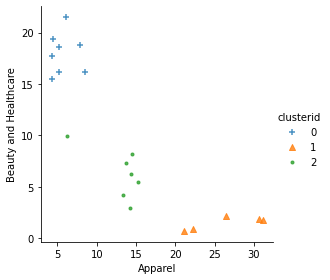

In [10]:
markers = ['+','^','.']
sn.lmplot( "Apparel", "Beauty and Healthcare",
data=customers_data,
hue = "clusterid",
fit_reg=False,
markers = markers,
size = 4 );

# **Normalizing the features**

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(
  customers_data[["Apparel", "Beauty and Healthcare"]] )
scaled_customers_df[0:5]

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957]])

In [13]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_customers_df )
customers_data["clusterid_new"] = clusters_new.labels_

# **Plotting Scatter plot again**

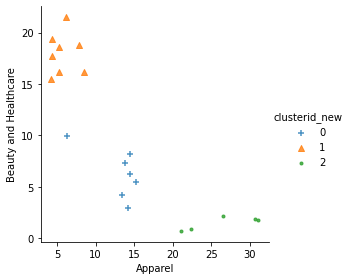

In [14]:
markers = ['+','^','.']
sn.lmplot( "Apparel", "Beauty and Healthcare",
data=customers_data,
hue = "clusterid_new",
fit_reg=False,
markers = markers,
size = 4 );

# **Cluster Centers and Interpreting the Clusters**

In [15]:
customers_data.groupby( 'clusterid' )['Apparel',
'Beauty and Healthcare'].agg( ["mean",
'std'] ).reset_index()

clusterid    Apparel           Beauty and Healthcare          
                  mean       std                  mean       std
0         0   5.741250  1.646003             17.987500  2.001027
1         1  26.320000  4.599130              1.500000  0.659545
2         2  13.104286  3.077655              6.337143  2.406697

# **verifying using dendogram method**

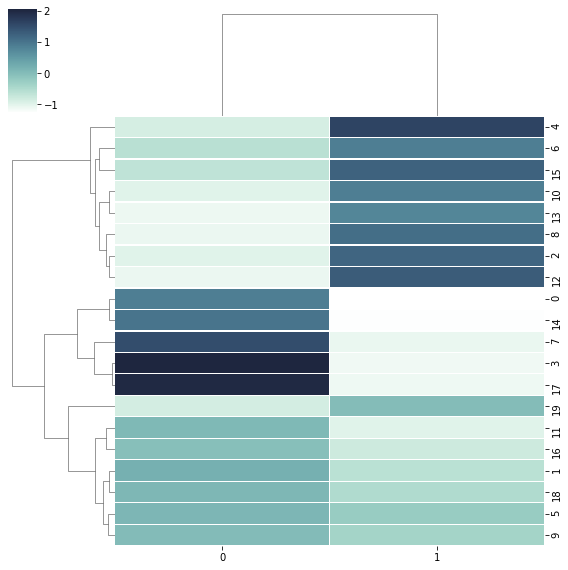

In [16]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_customers_df, cmap=cmap, linewidths=.2,
              figsize = (8,8) );

In [17]:
customers_data.iloc[[10,16]]


,Customer,Apparel,Beauty and Healthcare,clusterid,clusterid_new
10,11,5.2,16.2,0,1
16,17,13.4,4.2,2,0


In [18]:
customers_data.iloc[[2,18]]

,Customer,Apparel,Beauty and Healthcare,clusterid,clusterid_new
2,3,5.22,18.60,0,1
18,19,14.40,6.28,2,0


# **Finding Optimal Number of Clusters using Elbow Method**

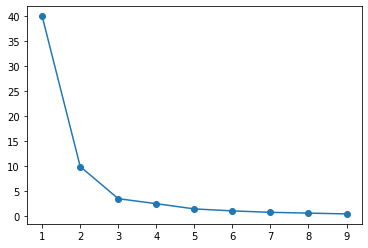

In [19]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_customers_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

**#the plot in the above figure indicates that the elbow point is at 3 which in turn indicates there might be 3 clusters existing in the dataset**